### Importing Libraries

In [ ]:
from __future__ import print_function
import keras 
import sys
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils, to_categorical
import matplotlib.pyplot as plt

### Model Data and Features

In [ ]:
num_channels=3
num_classes=10
img_rows=32
img_cols=32

In [ ]:
(x_train, y_train),(x_test, y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [ ]:
y_train=to_categorical(y_train, num_classes=num_classes)
y_test=to_categorical(y_test, num_classes=num_classes)

In [ ]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train /= 255
x_test /= 255

### Model Layers

In [ ]:
model = Sequential()
#First Layer
model.add(Conv2D(32, (3, 3),kernel_initializer='he_uniform', padding='same', input_shape=(img_rows, img_cols, num_channels)))
model.add(Activation('relu'))
model.add(BatchNormalization())

#Second Layer
model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

#Third Layer
model.add(Conv2D(64, (3, 3),kernel_initializer='he_uniform', padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

#Fourth Layer
model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

#Fifth Layer
model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

#Sixth Layer
model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

#Seventh Layer
model.add(Flatten())

#Eighth Layer
model.add(Dense(128, kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#Ninth Layer
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)       

### Model Compile

In [ ]:
sgd=SGD(learning_rate=0.01, momentum=0.9,nesterov=False)
model.compile(loss="categorical_crossentropy", optimizer=sgd,metrics=["accuracy"])

### Model Training

In [ ]:
batch_size=128
epochs=20
validation_split=0.2

history=model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  validation_split=validation_split,
                  shuffle=True)

Epoch 1/20
313/313 [==============================] - 12s 37ms/step - loss: 1.7435 - accuracy: 0.3860 - val_loss: 1.8223 - val_accuracy: 0.3612
Epoch 2/20
313/313 [==============================] - 11s 35ms/step - loss: 1.2970 - accuracy: 0.5265 - val_loss: 1.2845 - val_accuracy: 0.5414
Epoch 3/20
313/313 [==============================] - 11s 34ms/step - loss: 1.1397 - accuracy: 0.5893 - val_loss: 1.3031 - val_accuracy: 0.5579
Epoch 4/20
313/313 [==============================] - 11s 34ms/step - loss: 1.0262 - accuracy: 0.6346 - val_loss: 0.8703 - val_accuracy: 0.6902
Epoch 5/20
313/313 [==============================] - 11s 34ms/step - loss: 0.9484 - accuracy: 0.6633 - val_loss: 0.9683 - val_accuracy: 0.6566
Epoch 6/20
313/313 [==============================] - 11s 35ms/step - loss: 0.8852 - accuracy: 0.6874 - val_loss: 0.8571 - val_accuracy: 0.6927
Epoch 7/20
313/313 [==============================] - 11s 34ms/step - loss: 0.8370 - accuracy: 0.7042 - val_loss: 1.0308 - val_accuracy:

In [ ]:
scores=model.evaluate(x_test, y_test, verbose=1)
print("Test Loss: ", scores[0])
print("Test Accuracy: ",scores[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.5583 - accuracy: 0.8086
Test Loss:  0.5582671761512756
Test Accuracy:  0.8086000084877014


### Model Plots

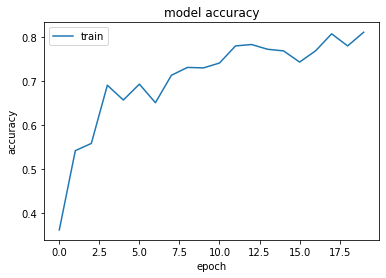

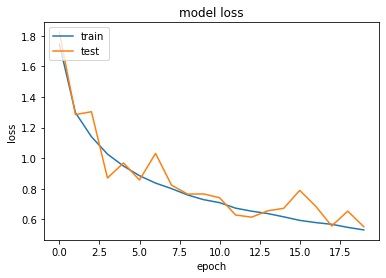

In [ ]:
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('model_accuracy.png')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('model_loss.png')
plt.show()

### Save Model

In [ ]:
model.save("cifar10_final.h5")